<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/2ndWeekTask/CitarumWater_ClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# 1. Import libraries yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer  # Digunakan untuk mengisi NaN
import matplotlib.pyplot as plt
import numpy as np


In [29]:
# 2. Memuat dataset
file_path = 'sample_data/CitarumWater.csv'  # Ganti dengan jalur file yang sesuai
citarum_water_data = pd.read_csv(file_path)

In [30]:
# 3.Pembersihan Data
# Menghapus kolom yang tidak diperlukan seperti No, NamaSungai, TitikPantau, Waktu, Temp, dan IP
citarum_water_data_cleaned = citarum_water_data.drop(['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'IP'], axis=1)


In [31]:
# 4. Mengonversi nilai non-numerik atau simbol "-" menjadi NaN
citarum_water_data_cleaned = citarum_water_data_cleaned.replace('-', np.nan)


<ipython-input-31-1393c6d746a0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  citarum_water_data_cleaned = citarum_water_data_cleaned.replace('-', np.nan)


In [32]:
# 5. Mengubah semua kolom menjadi tipe numerik (memastikan tidak ada data string yang tersisa)
citarum_water_data_cleaned = citarum_water_data_cleaned.apply(pd.to_numeric, errors='coerce')


In [33]:
# 6. Langkah tambahan: Hapus kolom yang seluruhnya kosong (jika ada)
citarum_water_data_cleaned = citarum_water_data_cleaned.dropna(axis=1, how='all')


In [34]:
# 7. Langkah baru: Mengatasi NaN dengan SimpleImputer
imputer = SimpleImputer(strategy='median')  # Menggunakan median untuk mengisi nilai NaN


In [35]:
# 8. Lakukan imputasi dan tetap menggunakan DataFrame dengan kolom yang sesuai
citarum_water_data_imputed = pd.DataFrame(imputer.fit_transform(citarum_water_data_cleaned), columns=citarum_water_data_cleaned.columns)


In [36]:
# 9. Mengubah kolom 'Class' menjadi klasifikasi biner
# Misalnya, jika 3 dianggap kualitas air buruk, kita beri label 1, selain itu diberi label 0 untuk kualitas baik
citarum_water_data_imputed['Class'] = citarum_water_data_imputed['Class'].apply(lambda x: 1 if x == 3 else 0)


In [37]:
# 10. Mendefinisikan Fitur dan Target
X = citarum_water_data_imputed.drop('Class', axis=1)
y = citarum_water_data_imputed['Class']

In [38]:
# 11. Membagi Data menjadi Set Pelatihan dan Set Pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# 12. Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standarisasi data pelatihan
X_test_scaled = scaler.transform(X_test)        # Standarisasi data pengujian


In [40]:
# 13. Melatih Model Logistic Regression
model = LogisticRegression()  # Inisialisasi model Logistic Regression
model.fit(X_train_scaled, y_train)  # Melatih model menggunakan data pelatihan


LogisticRegression()

In [41]:
# 14. Memprediksi Data Pengujian
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas prediksi untuk klasifikasi 1 (buruk)


In [42]:
# 15. Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)  # Menghitung Akurasi
precision = precision_score(y_test, y_pred)  # Menghitung Presisi
recall = recall_score(y_test, y_pred)  # Menghitung Recall
f1 = f1_score(y_test, y_pred)  # Menghitung F1-Score
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Menghitung AUC


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# 16. Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Akurasi: 0.9880
Presisi: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.8296


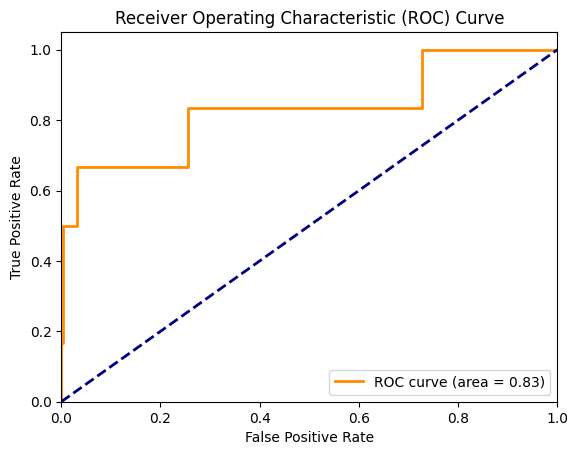

In [44]:
# 17. Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis diagonal sebagai baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()